In this statistical project, we received a data set consisting of 18 variables and 7933 observations, with the goal of trying to predict and interpret total wealth. Using various financial, retirement, home ownership, and age variables, and also binary covariates, I tried to develop the optimal prediction model that would best predict the outcome of total wealth using the provided data set and various models and testing procedures learned throughout the course.

In [1]:
#Importing Data

data_tr <- read.table("/Users/rodmanafshar/Desktop/Econ 178 Final Project/data_tr.txt", 
                      header = TRUE, sep = "\t", dec = ".")[,-1]

Upon beginning my search for the optimal prediction model, I conducted a preliminary analysis to further understand each of the variable’s relationship to total wealth. I plotted a histogram to examine the distribution of wealth across the data set and observed a long tail on the high end of wealth.
To remedy this, I removed the outliers for the purpose of decreasing the variability and increasing the statistical significance of my models. The justification of the removal of outliers is that the data set is very large, so removing some outliers can’t have that much leverage to begin with. Also, the outliers removed less than 6% of the data set, but if the case that that 30% of the data set consisted of outliers, then that would suggest that there is an important relationship of outliers to the data set, but that wasn’t the case here. So I removed the outliers by constructing a boxplot, and removing the observations that fell outside of the interquartile range.

       tw               ira             e401             nifa       
 Min.   :-100736   Min.   :    0   Min.   :0.0000   Min.   :     0  
 1st Qu.:   2500   1st Qu.:    0   1st Qu.:0.0000   1st Qu.:   175  
 Median :  20086   Median :    0   Median :0.0000   Median :  1300  
 Mean   :  39987   Mean   : 2258   Mean   :0.3574   Mean   :  7084  
 3rd Qu.:  63544   3rd Qu.:    0   3rd Qu.:1.0000   3rd Qu.:  6246  
 Max.   : 200203   Max.   :90000   Max.   :1.0000   Max.   :154000  
      inc             hmort             hval           hequity      
 Min.   :    -9   Min.   :     0   Min.   :     0   Min.   :-40000  
 1st Qu.: 18631   1st Qu.:     0   1st Qu.:     0   1st Qu.:     0  
 Median : 30000   Median :  1400   Median : 40000   Median :  5800  
 Mean   : 34504   Mean   : 28140   Mean   : 52364   Mean   : 24223  
 3rd Qu.: 45609   3rd Qu.: 49000   3rd Qu.: 83000   3rd Qu.: 37000  
 Max.   :180858   Max.   :150000   Max.   :300000   Max.   :194300  
      educ           male         

,tw,ira,e401,nifa,inc,hmort,hval,hequity,educ,male,twoearn,nohs,hs,smcol,col,age,fsize,marr,male_marr,age_sqr
1,53550,0,0,100,28146,60150,69000,8850,12,0,0,0,1,0,0,31,5,1,0,961
2,124635,0,0,61010,32634,20000,78000,58000,16,0,0,0,0,0,1,52,5,0,0,2704
3,192949,1800,0,7549,52206,15900,200000,184100,11,1,1,1,0,0,0,50,3,1,1,2500
4,-513,0,0,2487,45252,0,0,0,15,0,1,0,0,1,0,28,4,1,0,784
6,24400,0,0,9000,76860,99600,120000,20400,15,0,1,0,0,1,0,49,6,1,0,2401
7,33299,0,0,1099,57477,63000,89000,26000,17,0,1,0,0,0,1,40,4,1,0,1600


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-100736    2500   20086   39987   63544  200203 

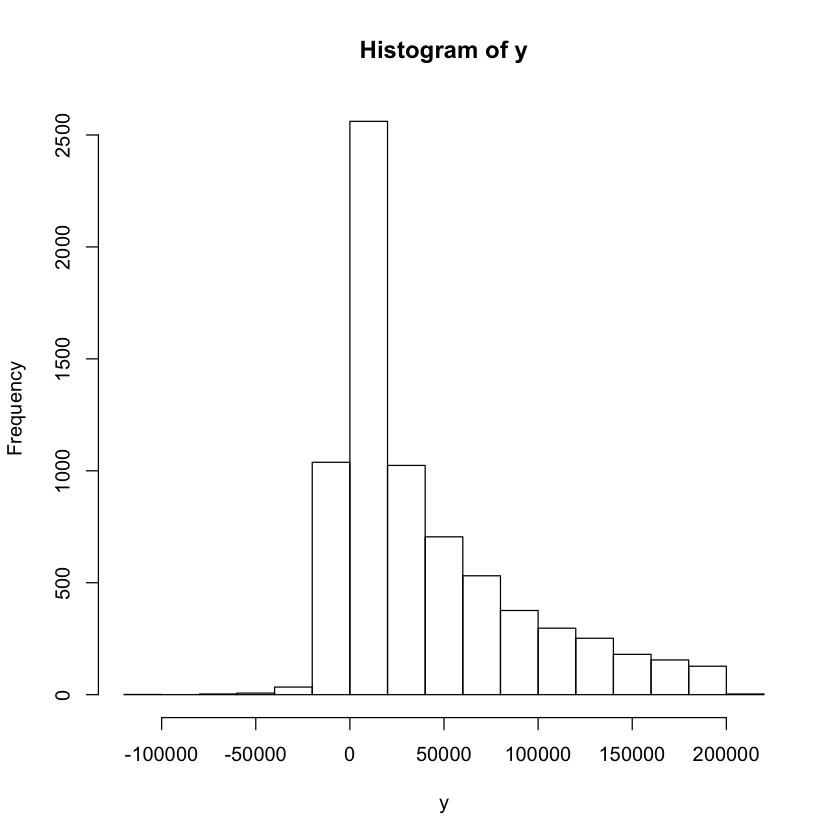

In [39]:
summary(data_tr)
head(data_tr)
y = data_tr$tw
hist(y)
summary(y)

[1]  212087  660413  346394  275240  320829  365897  215822  718000  337000
 [10]  459121  239350  335685  275008  448400  336200  241350  216000  220250
 [19]  430574  260000  329499 -117200  300000  534300  356200  404247  576200
 [28]  240850  217249  246789  206589  237000  444699  422500  204799  202100
 [37]  225096  219760  289249  495500  248400  266501  247000  246000  328600
 [46]  306997  229900  296012  290747  304234  366698  288996  288849  421000
 [55]  233500  227599  507725  264750  274440  329000  203000  251250  254794
 [64]  257642  339000  383915  254928  311000  347827  251000  226999  239600
 [73]  252000  226628  223599  234048  253600  335000  370000  582700  219241
 [82]  308409  206049  275350  205010  234424  352200  258500  222350  390863
 [91]  242999  202333  252000  235200  335674  200874  380199 -248950  439599
[100]  260706  297150  373750  256350  243500  334200  205500  218896 -299701
[109]  479700  595898  376000  314300  206700  231463  414998  274100  378600
[118]  231759  213220  219583 -279000  209885  351700  206779  227298  204535
[127]  225575  212898  625000  208800  221683  299500  532600  219400  213000
[136]  217349  277991 1150499  546510 1294619  554400 1147726  261075  281550
[145]  236086  302775  418561 1168999  232499  202650  517749  262900 1315400
[154]  350445  224000  337150  533402  243625  282500  726650  242500  317958
[163]  243828  224999  333970  228013 -201789  386874  234650  303200  279042
[172]  356698  223425  377400  513100  282350  252897  273000  208319  351159
[181]  455092  328349  276799  243000  205849  262225  230193  345000  595000
[190]  418500  254240  404550  261000  235000  227000  332800  283998  206100
[199]  259267  464500  347000  203300  386000  248842  267000  201640  329901
[208]  232574  417500  275874  346398  395150  282350  208300  307599  552342
[217]  383199  346500  225010 1375947  265800 1074139 1009673  242129  376699
[226]  967800  278496  231000  448097  318098  378700  247500  254000  466113
[235]  222300  232750  202600  265271  267000  389000  342400  273000  668249
[244]  317230  260056  231500  203200  205999  391450  201160  341999  269049
[253]  241450  214499  224000  257625  404575  805603  272000  293596  372800
[262] 1424445  359599  214500  265000  277998  259400  410000  216091  366999
[271]  390300  356000  467600  224794  528600  425798  310573  405796  719500
[280]  272469  220075  343600  211498  220100  277500  215461  464100  276448
[289]  429100  212950  374800  221828  215000  305750  291675  205800  201899
[298]  462600  246000  291900  286750  375300  245870  426119  223821  604200
[307]  375460  314200  403705  385548  229000  380400  615234  370872  578249
[316]  460331  276000  373980  329205  429998  209200  225300  748000  672300
[325]  201450  302288  318000  314000  257200  413400  248000  265229  206250
[334]  209981  202075  445100  205240  238700  325948  264629  223849  573300
[343]  204257  406349  562679 1150677 1008000  326700  229900  220199  205471
[352]  328625  334549  342000  221553  310385  219364  259800  243200  251010
[361]  371020  313812  353100  230830  367276  202150  385097 1338173  213600
[370]  386600  321000  257500  427550  222000  256616  213365  229906  282300
[379]  397000  588048  369425  717500  231750  250500  274799  270110 1887115
[388]  261400  274199  307309  426000  466990  598200  236000  273700  384100
[397]  258249  373598  237004  294100  459499 -502302  255550 1046900  349400
[406]  421899  262200  259500  270300  655620  240300  224100  237270  274474
[415]  270649  293393  256926  214593  337949  374069  296098  202279  271738
[424]  300800  364700  286750  269496  258290  224742  381630  461940  624300
[433]  229500  444916  215023  207135  493600  215685  219207  263910  411500
[442]  215226  214725  443000  217750  269550  203470  466695  324000  294856
[451]  201438  377149  230592  222899  252749  231950  267050  234504  313750
[460]  300950  270900  2

  [1]  212087  660413  346394  275240  320829  365897  215822  718000  337000
 [10]  459121  239350  335685  275008  448400  336200  241350  216000  220250
 [19]  430574  260000  329499 -117200  300000  534300  356200  404247  576200
 [28]  240850  217249  246789  206589  237000  444699  422500  204799  202100
 [37]  225096  219760  289249  495500  248400  266501  247000  246000  328600
 [46]  306997  229900  296012  290747  304234  366698  288996  288849  421000
 [55]  233500  227599  507725  264750  274440  329000  203000  251250  254794
 [64]  257642  339000  383915  254928  311000  347827  251000  226999  239600
 [73]  252000  226628  223599  234048  253600  335000  370000  582700  219241
 [82]  308409  206049  275350  205010  234424  352200  258500  222350  390863
 [91]  242999  202333  252000  235200  335674  200874  380199 -248950  439599
[100]  260706  297150  373750  256350  243500  334200  205500  218896 -299701
[109]  479700  595898  376000  314300  206700  231463  414998  2

,tw,ira,e401,nifa,inc,hmort,hval,hequity,educ,male,twoearn,nohs,hs,smcol,col,age,fsize,marr
5,212087,0,0,10625,33126,90000,300000,210000,12,0,0,0,1,0,0,42,3,0
18,660413,50250,0,310163,71535,0,300000,300000,18,0,0,0,0,0,1,63,2,1
22,346394,0,0,53698,42084,52000,250000,198000,16,1,0,0,0,0,1,42,1,0
30,275240,0,0,40,27168,73000,300000,227000,7,0,0,1,0,0,0,43,6,1
49,320829,7000,0,999,51060,0,300000,300000,15,1,0,0,0,1,0,37,1,0
69,365897,58000,0,31897,79545,0,75000,75000,18,0,0,0,0,0,1,59,2,1
71,215822,15522,0,48500,41994,96000,210000,114000,12,1,1,0,1,0,0,37,4,1
88,718000,50000,0,34000,97299,0,275000,275000,16,1,1,0,0,0,1,52,4,1
159,337000,7000,0,4000,28050,132000,257000,125000,16,0,0,0,0,0,1,61,2,1
165,459121,20000,0,195141,45444,0,80000,80000,13,0,0,0,0,1,0,61,2,1


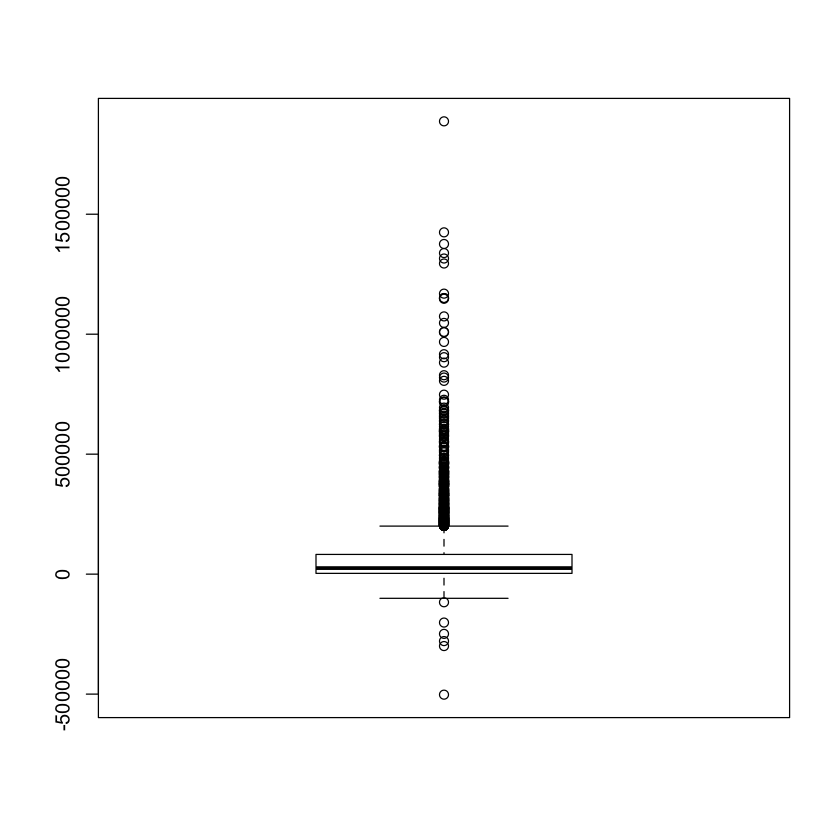

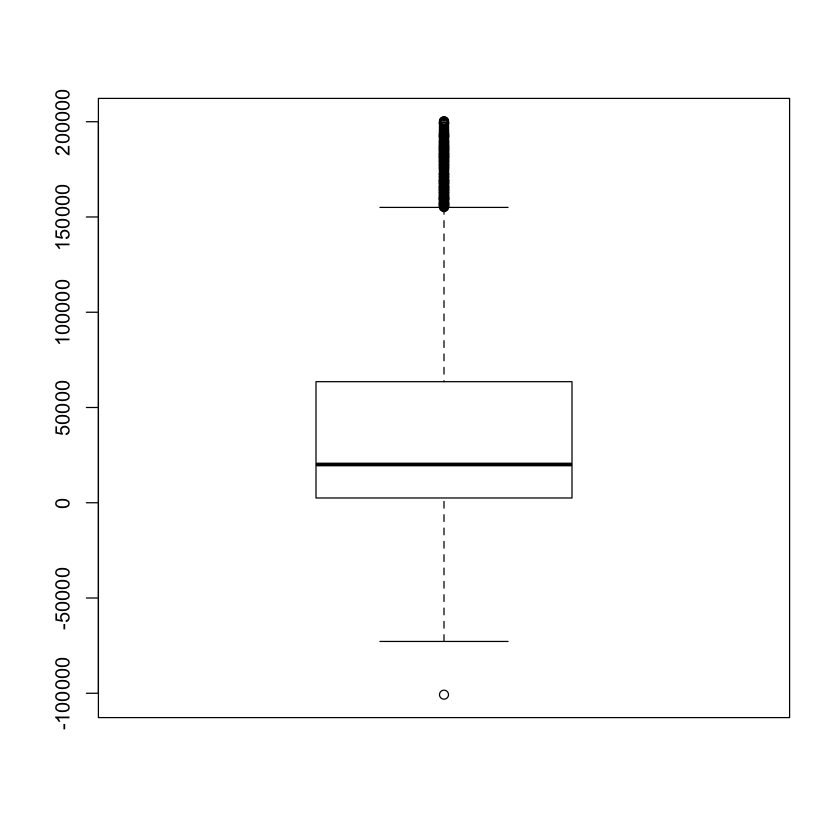

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-100736    2500   20086   39987   63544  200203 

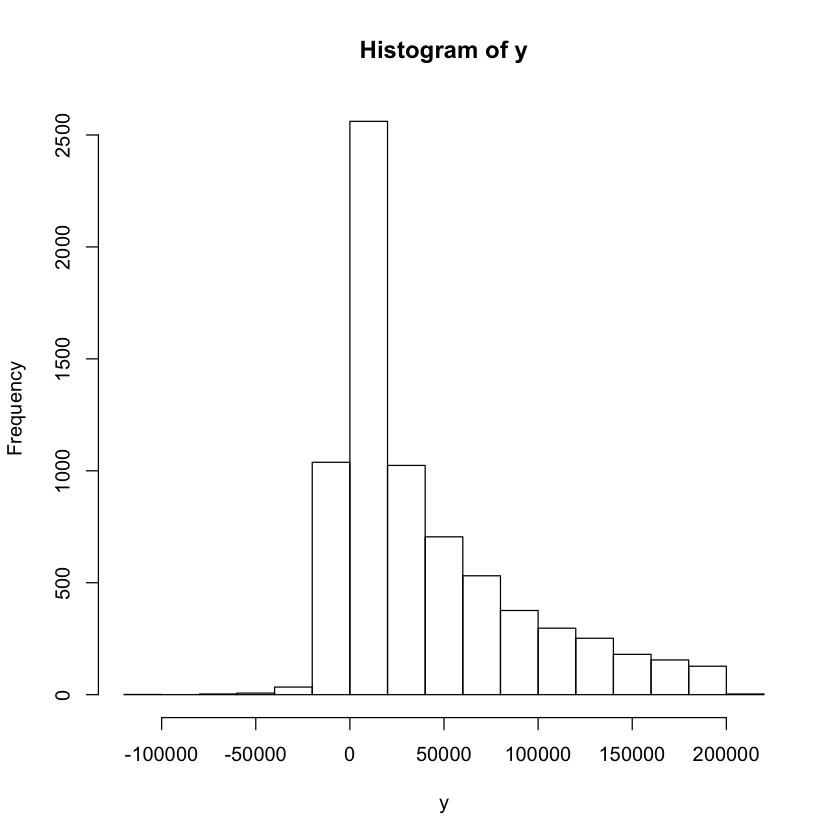

In [4]:
#removing outliers
boxplot(data_tr$tw)
boxplot(data_tr$tw)$out
outliers<- boxplot(data_tr$tw, plot=FALSE)$out
print(outliers)
data_tr[which(data_tr$tw %in% outliers),]
data_tr <- data_tr[-which(data_tr$tw %in% outliers),]
boxplot(data_tr$tw)
y = data_tr$tw
hist(y)
summary(y)


It turns out that my omission of outliers was beneficial to my models as the observations in my plots all remained in Cook’s lines, whereas before some would be outside of the boundaries. This was my histogram after removing the outliers.

In [5]:
###Stepwise model to help find good variables to work with
library(MASS)
reg_stepwise_forwards <- lm(tw ~ 1, data = data_tr)
reg_stepwise_backward <- lm(tw~ ., data=data_tr)
#forward stepwise
a = stepAIC(reg_stepwise_forwards, scope=list(lower=reg_stepwise_forwards, upper=reg_stepwise_backward), 
            direction= "forward")
#backwards stepwise
b=stepAIC(reg_stepwise_backward, scope=list(lower=reg_stepwise_forwards, upper=reg_stepwise_backward), 
          direction= "backward")
# report the coefficients  
summary(reg_stepwise_forwards)
summary(reg_stepwise_backward)
coef(a)
coef(b)

Start:  AIC=157707
tw ~ 1

          Df  Sum of Sq        RSS    AIC
+ hequity  1 1.2356e+13 5.5475e+12 149163
+ hval     1 9.2349e+12 8.6685e+12 152419
+ nifa     1 4.6902e+12 1.3213e+13 155493
+ inc      1 3.2295e+12 1.4674e+13 156258
+ ira      1 2.8861e+12 1.5017e+13 156427
+ hmort    1 2.2304e+12 1.5673e+13 156739
+ age      1 2.1234e+12 1.5780e+13 156788
+ marr     1 7.3432e+11 1.7169e+13 157404
+ e401     1 7.2708e+11 1.7176e+13 157407
+ twoearn  1 4.1790e+11 1.7485e+13 157537
+ educ     1 3.3292e+11 1.7570e+13 157572
+ col      1 2.3896e+11 1.7664e+13 157611
+ nohs     1 1.8919e+11 1.7714e+13 157632
+ male     1 1.2690e+11 1.7776e+13 157657
+ fsize    1 4.9058e+10 1.7854e+13 157689
<none>                  1.7903e+13 157707
+ hs       1 4.4948e+09 1.7899e+13 157707
+ smcol    1 3.5897e+09 1.7900e+13 157708

Step:  AIC=149163
tw ~ hequity

          Df  Sum of Sq        RSS    AIC
+ nifa     1 2.5381e+12 3.0094e+12 144704
+ ira      1 1.1688e+12 4.3786e+12 147439
+ inc      1 6.9


Call:
lm(formula = tw ~ 1, data = data_tr)

Residuals:
    Min      1Q  Median      3Q     Max 
-140723  -37487  -19900   23557  160216 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  39986.9      580.1   68.93   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 49550 on 7293 degrees of freedom



Call:
lm(formula = tw ~ ., data = data_tr)

Residuals:
    Min      1Q  Median      3Q     Max 
-119968   -7546   -2042    2488  180116 

Coefficients: (2 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.128e+04  3.502e+03  -3.220 0.001287 ** 
ira          1.127e+00  3.169e-02  35.572  < 2e-16 ***
e401         7.573e+03  4.577e+02  16.544  < 2e-16 ***
nifa         1.045e+00  1.546e-02  67.628  < 2e-16 ***
inc          1.253e-01  1.410e-02   8.887  < 2e-16 ***
hmort       -9.621e-01  1.040e-02 -92.525  < 2e-16 ***
hval         9.881e-01  6.660e-03 148.349  < 2e-16 ***
hequity             NA         NA      NA       NA    
educ         2.051e+02  1.967e+02   1.042 0.297266    
male         4.288e+02  5.702e+02   0.752 0.452102    
twoearn     -2.182e+03  6.007e+02  -3.633 0.000282 ***
nohs         9.598e+02  1.777e+03   0.540 0.589014    
hs           1.340e+03  1.094e+03   1.225 0.220743    
smcol        1.332e+03  8.400e+02   

(Intercept)       hequity          nifa           ira          e401 
-7.181844e+03  9.881182e-01  1.044500e+00  1.126554e+00  7.565927e+03 
          inc           age       twoearn         hmort         fsize 
 1.241819e-01  1.814915e+02 -2.210065e+03  2.569031e-02 -2.694522e+02 
         nohs 
-1.095053e+03

(Intercept)           ira          e401          nifa           inc 
-7114.3674465     1.1277840  7617.5338272     1.0454523     0.1276562 
        hmort          hval       twoearn           age         fsize 
   -0.9623239     0.9884371 -2205.3139954   174.5614326  -305.7441821

Next, I ran simple linear regressions with variables that I intuitively thought would affect total wealth and observed the results to see whether they would be good predictors for my model. Beginning with “hequity”, “nifa”, and “ira”, I noticed that there was a higher R squared than my other linear models, they had a low p-value suggesting statistical significance, and they weren’t collinear with each other. I created a least squares regression consisting of only the three variables and found a mean squared prediction error of 4,123 million. To make improvements and try and bring down the mean squared prediction error, I included new variables to the model. To figure out which new variables to include, I ran a forward and backwards stepwise regression with the AIC function to find good variables to work with.
The two models only differed in a few variables, so I decided to include the variables that were the most correlated with wealth with the lowest AIC, and exclude the variables that were collinear, like including both “hmort” and “hequity”, or including multiple education dummy variables. Once I decided on my variables, I plotted each variable with total wealth to see if the relationship was linear, or nonlinear. To find out the optimal degrees of freedom for each variable, I ran a stepwise regression to select the degrees.


Call:
lm(formula = tw ~ hequity, data = data_tr)

Residuals:
    Min      1Q  Median      3Q     Max 
-112812  -13549   -9210    3983  186724 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.208e+04  3.902e+02   30.95   <2e-16 ***
hequity     1.152e+00  9.041e-03  127.44   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27580 on 7292 degrees of freedom
Multiple R-squared:  0.6901,	Adjusted R-squared:  0.6901 
F-statistic: 1.624e+04 on 1 and 7292 DF,  p-value: < 2.2e-16



Call:
lm(formula = tw ~ ira, data = data_tr)

Residuals:
    Min      1Q  Median      3Q     Max 
-144285  -32359  -17854   19742  166555 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.365e+04  5.577e+02   60.34   <2e-16 ***
ira         2.807e+00  7.498e-02   37.44   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 45380 on 7292 degrees of freedom
Multiple R-squared:  0.1612,	Adjusted R-squared:  0.1611 
F-statistic:  1401 on 1 and 7292 DF,  p-value: < 2.2e-16



Call:
lm(formula = tw ~ nifa, data = data_tr)

Residuals:
    Min      1Q  Median      3Q     Max 
-171495  -27901  -17253   17810  168038 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.790e+04  5.521e+02   50.53   <2e-16 ***
nifa        1.706e+00  3.354e-02   50.88   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 42570 on 7292 degrees of freedom
Multiple R-squared:  0.262,	Adjusted R-squared:  0.2619 
F-statistic:  2588 on 1 and 7292 DF,  p-value: < 2.2e-16


[1] 342375540


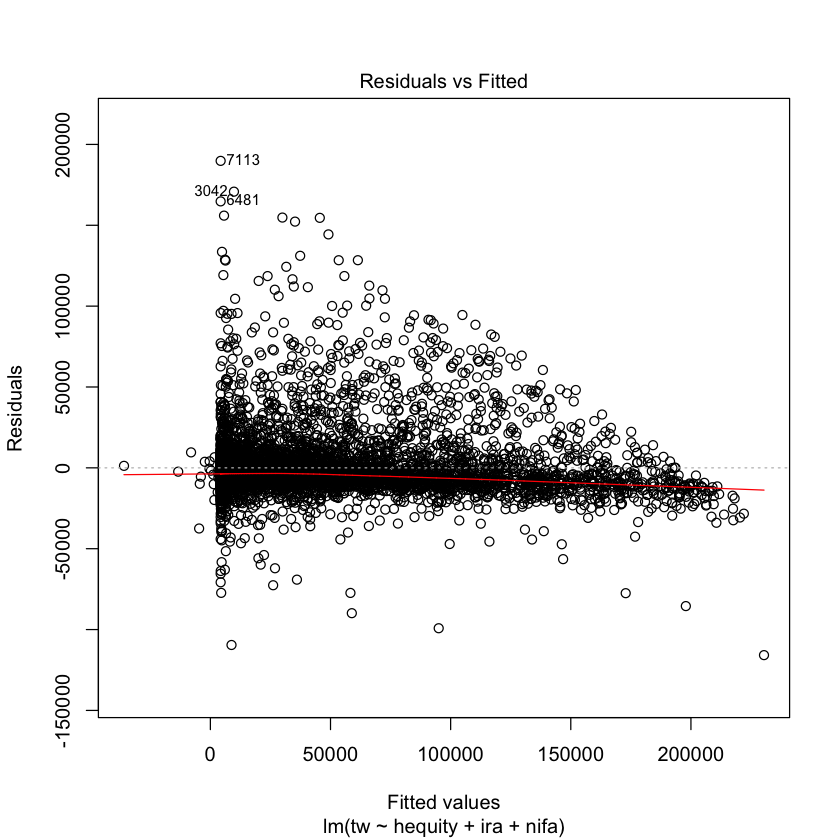

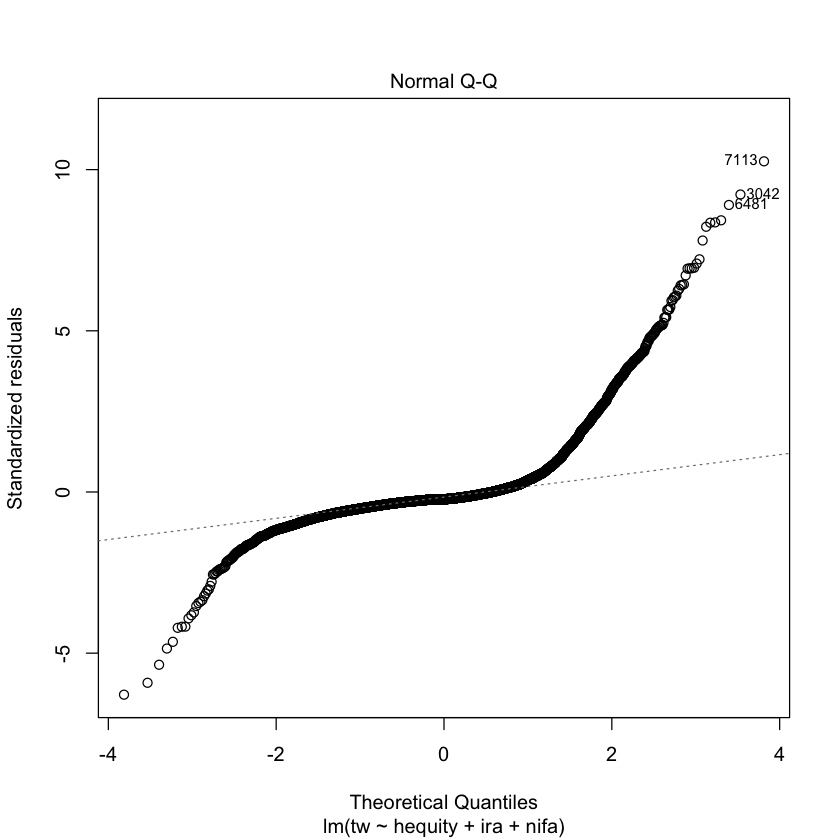

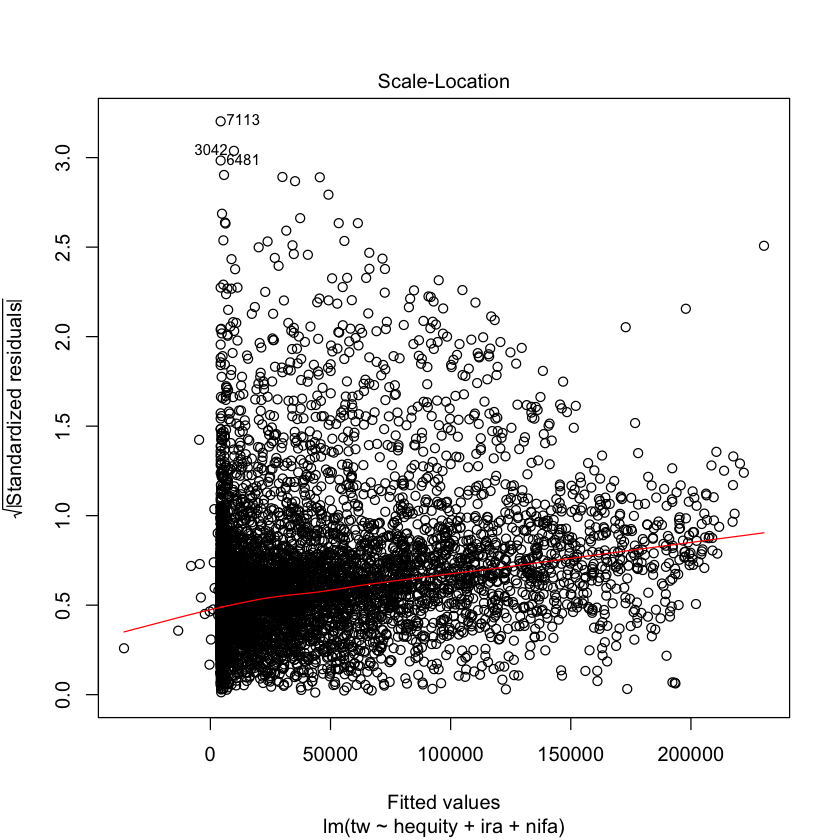

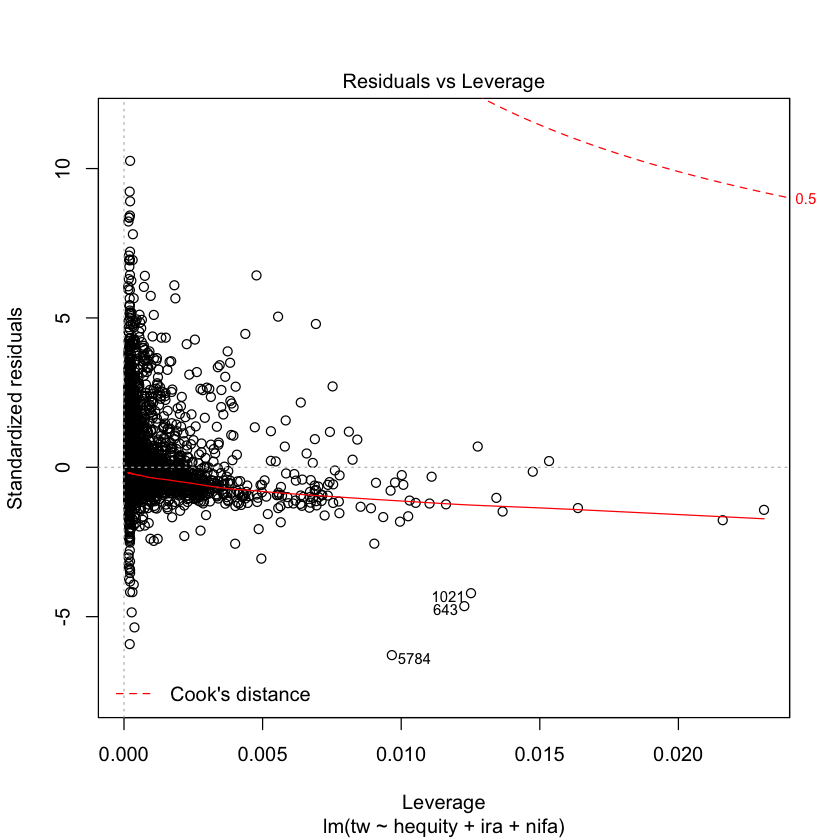

In [6]:
###Linear regressions to find ideal variable for regressions 
reg_linear <- lm(tw~hequity, data=data_tr) 
summary(reg_linear)
reg_linear2 <- lm(tw~ira, data=data_tr) 
summary(reg_linear2)
reg_linear3 <- lm(tw~nifa, data=data_tr) 
summary(reg_linear3)

reg <- lm(tw~hequity + ira + nifa, data=data_tr)
reg_pred <- predict(reg, newdata=data_tr)
mse_reg <- mean((data_tr$tw - reg_pred)^2)
print(mse_reg)
plot(reg)

In [7]:
# Hequity, NIFA, and IRA are good candidates for variables because they have high R-squared,...
# they are statistically significant, and they aren't collinear

In [8]:
###Polynomial model - because relationships with variables in non-linear
#running stepwise first to select the degree for hequity
library(MASS)
X <- poly(data_tr$hequity,10)
full <- lm(data_tr$tw ~ ., data=X)
null <- lm(data_tr$tw ~ 1, data=X)
a <- stepAIC(null, scope=list(lower=null, upper=full), direction='forward')
coef(a)
extractAIC(a)
#running stepwise first to select the degree for nifa
X2 <- poly(data_tr$nifa,10)
full2 <- lm(data_tr$tw ~ ., data=X2)
null2 <- lm(data_tr$tw ~ 1, data=X2)
a2 <- stepAIC(null2, scope=list(lower=null2, upper=full2), direction='forward')
coef(a2)
extractAIC(a2)
#running stepwise first to select the degree for ira
X3 <- poly(data_tr$ira,10)
full3 <- lm(data_tr$tw ~ ., data=X3)
null3 <- lm(data_tr$tw ~ 1, data=X3)
a3 <- stepAIC(null3, scope=list(lower=null3, upper=full3), direction='forward')
coef(a3)
extractAIC(a3)

cbind(extractAIC(a), extractAIC(a2),extractAIC(a3))

Start:  AIC=157707
data_tr$tw ~ 1

       Df  Sum of Sq        RSS    AIC
+ `1`   1 1.2356e+13 5.5475e+12 149163
+ `2`   1 2.1658e+11 1.7687e+13 157620
<none>               1.7903e+13 157707
+ `3`   1 1.5292e+09 1.7902e+13 157708
+ `4`   1 1.1688e+09 1.7902e+13 157709
+ `5`   1 4.9543e+08 1.7903e+13 157709
+ `8`   1 4.8966e+08 1.7903e+13 157709
+ `7`   1 2.0494e+08 1.7903e+13 157709
+ `6`   1 8.3381e+07 1.7903e+13 157709
+ `10`  1 7.0944e+06 1.7903e+13 157709
+ `9`   1 5.2122e+05 1.7903e+13 157709

Step:  AIC=149163
data_tr$tw ~ `1`

       Df  Sum of Sq        RSS    AIC
+ `2`   1 2.1658e+11 5.3309e+12 148875
+ `3`   1 1.5292e+09 5.5459e+12 149163
<none>               5.5475e+12 149163
+ `4`   1 1.1688e+09 5.5463e+12 149164
+ `5`   1 4.9543e+08 5.5470e+12 149164
+ `8`   1 4.8966e+08 5.5470e+12 149164
+ `7`   1 2.0494e+08 5.5473e+12 149165
+ `6`   1 8.3381e+07 5.5474e+12 149165
+ `10`  1 7.0944e+06 5.5474e+12 149165
+ `9`   1 5.2122e+05 5.5475e+12 149165

Step:  AIC=148874.6
data_tr$tw

(Intercept)         `1`         `2`         `3` 
   39986.90  3515094.97  -465377.86    39105.32

[1]      4.0 148874.5

Start:  AIC=157707
data_tr$tw ~ 1

       Df  Sum of Sq        RSS    AIC
+ `1`   1 4.6902e+12 1.3213e+13 155493
+ `2`   1 7.3561e+11 1.7168e+13 157403
+ `3`   1 2.3321e+11 1.7670e+13 157613
+ `4`   1 1.2374e+11 1.7780e+13 157658
+ `5`   1 9.0112e+10 1.7813e+13 157672
+ `7`   1 6.6354e+10 1.7837e+13 157682
+ `6`   1 5.0028e+10 1.7853e+13 157689
+ `8`   1 2.1562e+10 1.7882e+13 157700
+ `9`   1 1.6119e+10 1.7887e+13 157702
+ `10`  1 1.4379e+10 1.7889e+13 157703
<none>               1.7903e+13 157707

Step:  AIC=155493.3
data_tr$tw ~ `1`

       Df  Sum of Sq        RSS    AIC
+ `2`   1 7.3561e+11 1.2478e+13 155078
+ `3`   1 2.3321e+11 1.2980e+13 155365
+ `4`   1 1.2374e+11 1.3089e+13 155427
+ `5`   1 9.0112e+10 1.3123e+13 155445
+ `7`   1 6.6354e+10 1.3147e+13 155459
+ `6`   1 5.0028e+10 1.3163e+13 155468
+ `8`   1 2.1562e+10 1.3192e+13 155483
+ `9`   1 1.6119e+10 1.3197e+13 155486
+ `10`  1 1.4379e+10 1.3199e+13 155487
<none>               1.3213e+13 155493

Step:  AIC=155077.5
data_tr$

(Intercept)         `1`         `2`         `3`         `4`         `5` 
    39986.9   2165679.9   -857678.0    482917.3   -351762.5    300186.7 
        `7`         `6`         `8`         `9`        `10` 
   257593.5   -223668.6   -146840.5    126958.7   -119912.4

[1]     11.0 154724.5

Start:  AIC=157707
data_tr$tw ~ 1

       Df  Sum of Sq        RSS    AIC
+ `1`   1 2.8861e+12 1.5017e+13 156427
+ `2`   1 4.7312e+11 1.7430e+13 157514
+ `3`   1 1.5183e+11 1.7752e+13 157647
+ `4`   1 5.1290e+10 1.7852e+13 157688
+ `6`   1 2.0475e+10 1.7883e+13 157701
+ `7`   1 1.6802e+10 1.7887e+13 157702
+ `5`   1 9.7448e+09 1.7894e+13 157705
+ `10`  1 7.7785e+09 1.7896e+13 157706
<none>               1.7903e+13 157707
+ `9`   1 3.8870e+09 1.7899e+13 157707
+ `8`   1 8.5467e+08 1.7902e+13 157709

Step:  AIC=156426.9
data_tr$tw ~ `1`

       Df  Sum of Sq        RSS    AIC
+ `2`   1 4.7312e+11 1.4544e+13 156195
+ `3`   1 1.5183e+11 1.4865e+13 156355
+ `4`   1 5.1290e+10 1.4966e+13 156404
+ `6`   1 2.0475e+10 1.4997e+13 156419
+ `7`   1 1.6802e+10 1.5000e+13 156421
+ `5`   1 9.7448e+09 1.5008e+13 156424
+ `10`  1 7.7785e+09 1.5009e+13 156425
<none>               1.5017e+13 156427
+ `9`   1 3.8870e+09 1.5013e+13 156427
+ `8`   1 8.5467e+08 1.5016e+13 156428

Step:  AIC=156195.4
data_tr$

(Intercept)         `1`         `2`         `3`         `4`         `6` 
    39986.9   1698851.4   -687836.3    389651.3   -226473.6   -143090.8 
        `7`         `5`        `10` 
   129623.8     98715.6    -88196.0

[1]      9.0 156076.8

4.0,11.0,9.0
148874.5,154724.5,156076.8


In [9]:
#Best degree for hequity  is 4, nifa is 11, ira is 9

The stepwise regression resulted in a degree of four for “hequity”, eleven for “nifa”, and nine for “ira”. First, I compared a stepwise, lasso, and ridge prediction model using only these three variables for fear of overfitting the model and damaging the model’s prediction capability. To compare the prediction of the models, I used k-fold cross-validation with five folds. I used k-fold cross-validation instead of leave-one-out-cross-validation because it’s much less computationally intensive, and also has a smaller variance, despite LOOCV having a smaller bias. I created a data matrix of the transformed covariates with their respective optimized degrees of freedom, and created a “for loop” to carry out the cross validation.


In [13]:
###Comparing different models(stepwise, ridge, lasso) with selected polynomial variables
n <- length(y)
k <- 5
ii <- sample(rep(1:k, length= n))
pr.stepwise_backward <- pr.stepwise_forward <- pr.lasso <- pr.ridge <- rep(NA, length(y))
# New matrix of covariates for lasso and ridge
X1 <- poly(data_tr$hequity, 4) 
X2 <- poly(data_tr$nifa, 11)
X3 <- poly(data_tr$ira, 9)
data_poly <- data.frame(data_tr$tw,X1, X2, X3)

for (j in 1:k){
  
  hold <- (ii == j)
  train <- (ii != j)
  ## Stepwise 
  full <- lm(tw ~ poly(hequity, 4)+ poly(nifa, 11) + poly(ira, 9), data=data_tr[train,])
  null <- lm(tw ~ 1, data=data_tr[train,])
  a <- stepAIC(null, scope=list(lower=null, upper=full), trace = FALSE, direction='forward')
  # backward stepwise - AIC
  b <- stepAIC(full, scope=list(lower=null, upper=full), trace = FALSE, direction='backward')
  pr.stepwise_backward[hold] <- predict(b, newdata=data_tr[hold,])
  pr.stepwise_forward[hold] <- predict(a, newdata=data_tr[hold,])
  
  ## Lasso and Ridge
  xx.tr <- data_poly[train,-1]
  y.tr <-  y[train]
  xx.te <- data_poly[hold,-1]
  ridge.cv <- cv.glmnet(x=as.matrix(xx.tr), y=y.tr, nfolds=k, alpha=0)
  lasso.cv <- cv.glmnet(x=as.matrix(xx.tr), y=y.tr, nfolds=k, alpha=1)
  pr.lasso[hold] <- predict(lasso.cv, newx=as.matrix(xx.te))
  pr.ridge[hold] <- predict(ridge.cv, newx=as.matrix(xx.te))
}

mspe_step_backward <- mean((pr.stepwise_backward-y)^2)
mspe_step_forward <- mean((pr.stepwise_forward-y)^2)
mspe.Lasso <- mean((pr.lasso-y)^2)
mspe.ridge <- mean((pr.ridge-y)^2)

cbind(mspe_step_backward, mspe_step_forward, mspe.Lasso,mspe.ridge)

mspe_step_backward,mspe_step_forward,mspe.Lasso,mspe.ridge
330304693,330304693,347507816,359668692


In [14]:
#Stepwise model returned smallest mspe with 329615305, and 
#Lasso and ridge with a much larger 343523622 and 359276500 respectively

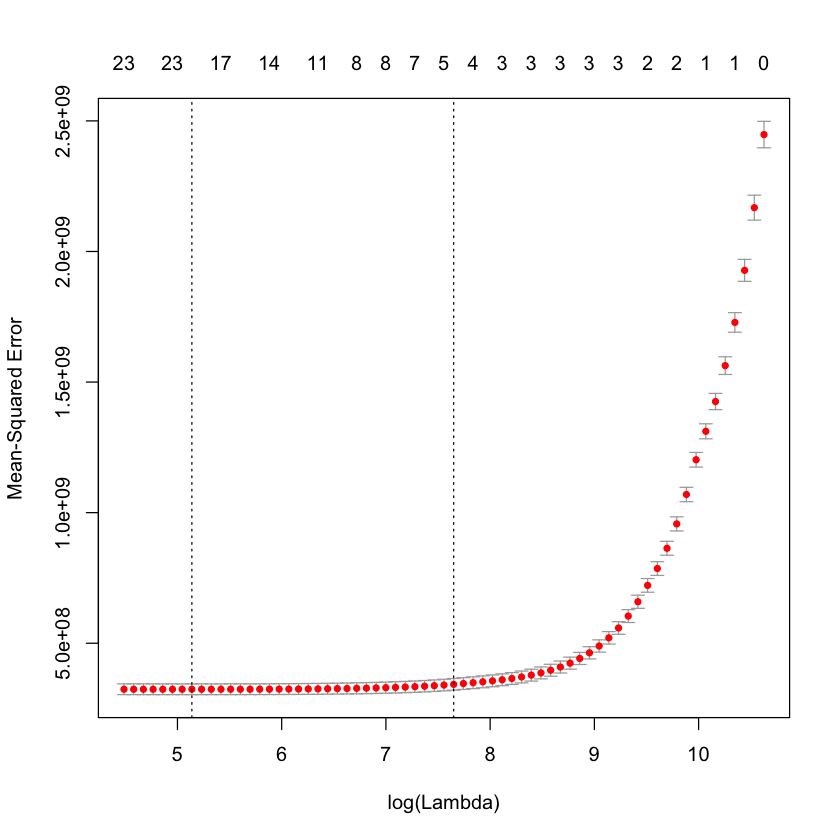

In [15]:
plot(lasso.cv)

The results showed that the stepwise model returned smallest mspe with 329615305, and lasso and ridge with a much larger 343523622 and 359276500 respectively. The stepwise had the best fit possibly because the AIC fine-tuned the best predictor value from all the possible options, or because it was the simplest model. The reason the ridge regression model performed poorly compared to the lasso may be because of their differences in their approach to the bias variance trade-off, as the coefficients are estimated differently. As the lambda increases, the flexibility of the ridge’s fit decreases, decreasing the variance but increasing the bias.

The ridge regressions penalty will always include all the predictors in the final model, the lasso, alternatively, decreases the variance by altering the amount of coefficients it includes in the model by setting some of the variable coefficients to zero during its model selection. So, the reason the stepwise and lasso performed better than the ridge regression is likely because both models perform variable selection, and by result, obtain a better fitting model in terms of mean squared prediction error, and in interpretability.

But my mean squared prediction error was still high, and to improve the model, I decided to include the variables that I had selected earlier, but left out for fear of overfitting. Now I am including two more polynomial variables, as well as binary indicators in the model. I conduct the same process as before, and choose the optimal degree for the new polynomial variables as I did before, and compare the stepwise, ridge, and lasso models with k-fold cross validation.

In [16]:
###New Model of stepwise, lasso, and ridge with polynomial variables and binary indicators to try and reduce mspe

In [17]:
### New with additional dummy variables - interaction
#running stepwise to select the degree for inc
library(MASS)
X4 <- poly(data_tr$inc,10)
full4 <- lm(data_tr$tw ~ ., data=X4)
null4 <- lm(data_tr$tw ~ 1, data=X4)
a4 <- stepAIC(null4, scope=list(lower=null4, upper=full4), direction='forward')
coef(a4)
extractAIC(a4)
#running stepwise to select the degree for age
X5 <- poly(data_tr$age,10)
full5 <- lm(data_tr$tw ~ ., data=X5)
null5 <- lm(data_tr$tw ~ 1, data=X5)
a5 <- stepAIC(null5, scope=list(lower=null5, upper=full5), direction='forward')
coef(a5)
extractAIC(a5)

cbind(extractAIC(a4),extractAIC(a5))

Start:  AIC=157707
data_tr$tw ~ 1

       Df  Sum of Sq        RSS    AIC
+ `1`   1 3.2295e+12 1.4674e+13 156258
+ `2`   1 1.0866e+11 1.7795e+13 157665
+ `3`   1 3.4520e+10 1.7869e+13 157695
+ `4`   1 2.0972e+10 1.7882e+13 157700
+ `7`   1 1.3503e+10 1.7890e+13 157704
<none>               1.7903e+13 157707
+ `8`   1 3.7798e+09 1.7900e+13 157708
+ `6`   1 2.3655e+09 1.7901e+13 157708
+ `9`   1 2.0799e+09 1.7901e+13 157708
+ `5`   1 1.4713e+09 1.7902e+13 157708
+ `10`  1 1.7774e+08 1.7903e+13 157709

Step:  AIC=156258.1
data_tr$tw ~ `1`

       Df  Sum of Sq        RSS    AIC
+ `2`   1 1.0866e+11 1.4565e+13 156206
+ `3`   1 3.4520e+10 1.4639e+13 156243
+ `4`   1 2.0972e+10 1.4653e+13 156250
+ `7`   1 1.3503e+10 1.4660e+13 156253
<none>               1.4674e+13 156258
+ `8`   1 3.7798e+09 1.4670e+13 156258
+ `6`   1 2.3655e+09 1.4671e+13 156259
+ `9`   1 2.0799e+09 1.4672e+13 156259
+ `5`   1 1.4713e+09 1.4672e+13 156259
+ `10`  1 1.7774e+08 1.4674e+13 156260

Step:  AIC=156205.9
data_tr$

(Intercept)         `1`         `2`         `3`         `4`         `7` 
    39986.9   1797080.6   -329629.2   -185795.7    144818.3   -116204.0

[1]      6.0 156177.3

Start:  AIC=157707
data_tr$tw ~ 1

       Df  Sum of Sq        RSS    AIC
+ `1`   1 2.1234e+12 1.5780e+13 156788
+ `2`   1 5.2918e+10 1.7850e+13 157687
+ `9`   1 5.5855e+09 1.7898e+13 157707
+ `6`   1 5.4035e+09 1.7898e+13 157707
<none>               1.7903e+13 157707
+ `5`   1 4.4674e+09 1.7899e+13 157707
+ `7`   1 2.0604e+09 1.7901e+13 157708
+ `4`   1 5.0373e+08 1.7903e+13 157709
+ `8`   1 4.0929e+08 1.7903e+13 157709
+ `3`   1 1.1173e+08 1.7903e+13 157709
+ `10`  1 2.4233e+07 1.7903e+13 157709

Step:  AIC=156788.2
data_tr$tw ~ `1`

       Df  Sum of Sq        RSS    AIC
+ `2`   1 5.2918e+10 1.5727e+13 156766
+ `9`   1 5.5855e+09 1.5774e+13 156788
+ `6`   1 5.4035e+09 1.5775e+13 156788
+ `5`   1 4.4674e+09 1.5775e+13 156788
<none>               1.5780e+13 156788
+ `7`   1 2.0604e+09 1.5778e+13 156789
+ `4`   1 5.0373e+08 1.5779e+13 156790
+ `8`   1 4.0929e+08 1.5780e+13 156790
+ `3`   1 1.1173e+08 1.5780e+13 156790
+ `10`  1 2.4233e+07 1.5780e+13 156790

Step:  AIC=156765.7
data_tr$

(Intercept)         `1`         `2`         `9`         `6`         `5` 
   39986.90  1457200.20  -230038.62   -74736.51    73508.70   -66838.64

[1]      6.0 156764.5

6.0,6.0
156177.3,156764.5


In [22]:
###Comparing different models(stepwise, ridge, lasso) with more polynomial variables and binary indicators
n <- length(y)
k <- 5
ii <- sample(rep(1:k, length= n))
pr.stepwise_backward <- pr.stepwise_forward <- pr.lasso <- pr.ridge <- rep(NA, length(y))
# New dataframe of covariates for lasso and ridge
X1 <- poly(data_tr$hequity, 4) 
X2 <- poly(data_tr$nifa, 11)
X3 <- poly(data_tr$ira, 9)
X4 <- poly(data_tr$inc, 6)
X5 <- poly(data_tr$age, 6)
X6 <- data_tr$e401
X7 <- data_tr$fsize
X8 <- data_tr$twoearn
X9 <- data_tr$nohs
X10 <- data_tr$male
data_poly <- data.frame(data_tr$tw,X1, X2, X3, X4, X5, X6, X7, X8, X9, X10)

for (j in 1:k){
  
  hold <- (ii == j)
  train <- (ii != j)
  # Stepwise with polynomial variables and binary indicators
  full <- lm(tw ~ poly(hequity, 4)+ poly(nifa, 11) + poly(ira, 9) + poly(inc, 6) + poly(age, 6) +
               e401 + fsize + twoearn + nohs + male, data=data_tr[train,])
  null <- lm(tw ~ 1, data=data_tr[train,])
  a <- stepAIC(null, scope=list(lower=null, upper=full), trace = FALSE, direction='forward')
  # backward stepwise with polynomial variables and binary indicators
  b <- stepAIC(full, scope=list(lower=null, upper=full), trace = FALSE, direction='backward')
  pr.stepwise_backward[hold] <- predict(b, newdata=data_tr[hold,])
  pr.stepwise_forward[hold] <- predict(a, newdata=data_tr[hold,])
  
  # Lasso and ridge with polynomial variables and binary indicators
  xx.tr <- data_poly[train,-1]
  y.tr <-  y[train]
  xx.te <- data_poly[hold,-1]
  ridge.cv <- cv.glmnet(x=as.matrix(xx.tr), y=y.tr, nfolds=k, alpha=0)
  lasso.cv <- cv.glmnet(x=as.matrix(xx.tr), y=y.tr, nfolds=k, alpha=1)
  pr.lasso[hold] <- predict(lasso.cv, newx=as.matrix(xx.te))
  pr.ridge[hold] <- predict(ridge.cv, newx=as.matrix(xx.te))
}

mspe_step_backward <- mean((pr.stepwise_backward-y)^2)
mspe_step_forward <- mean((pr.stepwise_forward-y)^2)
mspe.Lasso <- mean((pr.lasso-y)^2)
mspe.ridge <- mean((pr.ridge-y)^2)

cbind(mspe_step_backward, mspe_step_forward, mspe.Lasso,mspe.ridge)
AIC(a)

mspe_step_backward,mspe_step_forward,mspe.Lasso,mspe.ridge
325767004,324644243,328633229,345345607


[1] 130699.5

In [23]:
#The additions of variables and dummies reduced the mspe of each model 
# Stepwise is now 313881227, and lasso and ridge are 327264788 and 342887485 respectively

The interaction with the dummy variables in the model are useful because they capture the effects of education and marital status and will have a substantial impact on total wealth.
The results showed a substantial decrease in mean squared prediction error for all the models, suggesting that the inclusion of the new polynomial variables and interaction with the dummy variables effectively improved the model.

Still not satisfied with the model, I tried to make further improvements by creating a spline regression using the same variables. Because I increased the amount of polynomial variables in the previous models, I was worried that by making the formula more complex, the model would become over-fitted with the high degree variables, and the changing values for total wealth in an observation of the training set would affect the model for the data points that are farther off. To remedy this I created a regression spline using the same variables as before, with the idea that the knots would offset the problem of overfitting.

Warning message in predict.lm(spline.ns, newdata = data_tr[hold, ]):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(spline.ns, newdata = data_tr[hold, ]):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(spline.ns, newdata = data_tr[hold, ]):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(spline.ns, newdata = data_tr[hold, ]):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(spline.ns, newdata = data_tr[hold, ]):
“prediction from a rank-deficient fit may be misleading”

[1] 312213636


[1] 130427.8

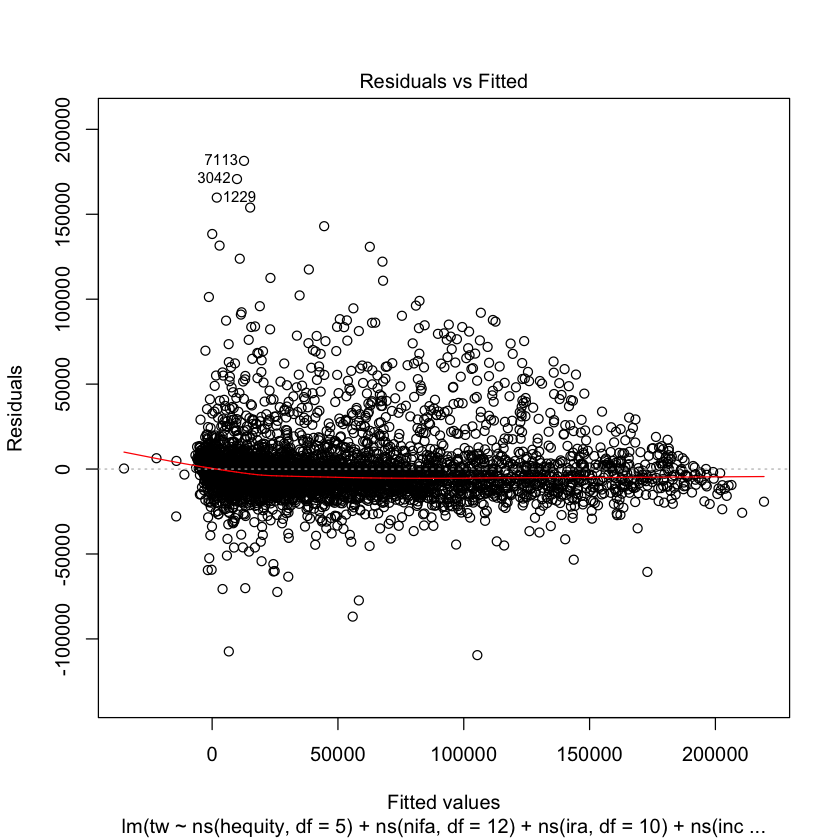

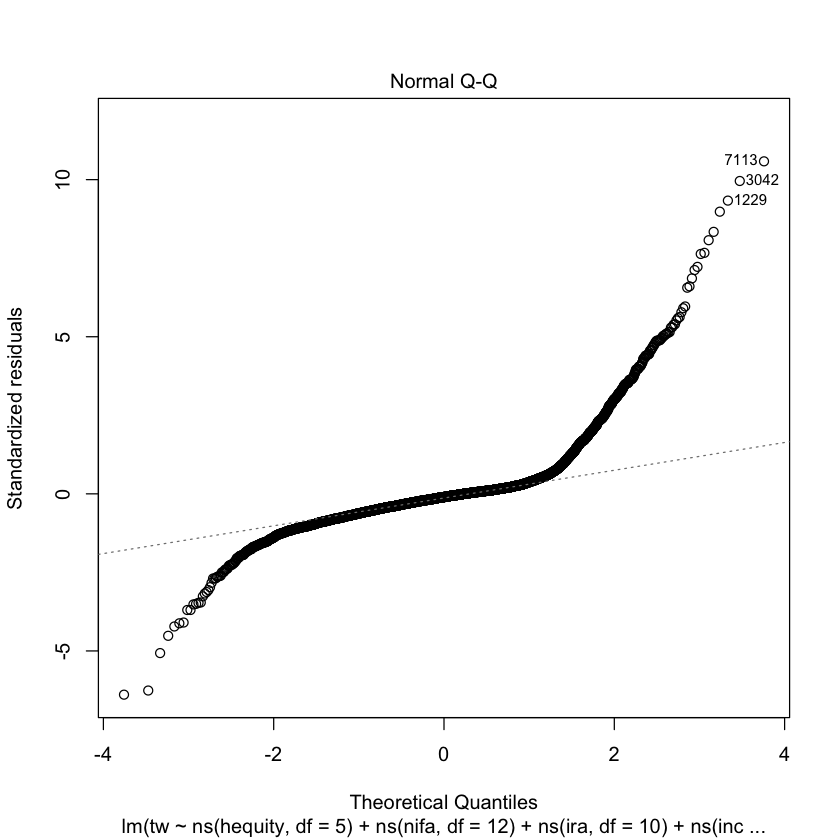

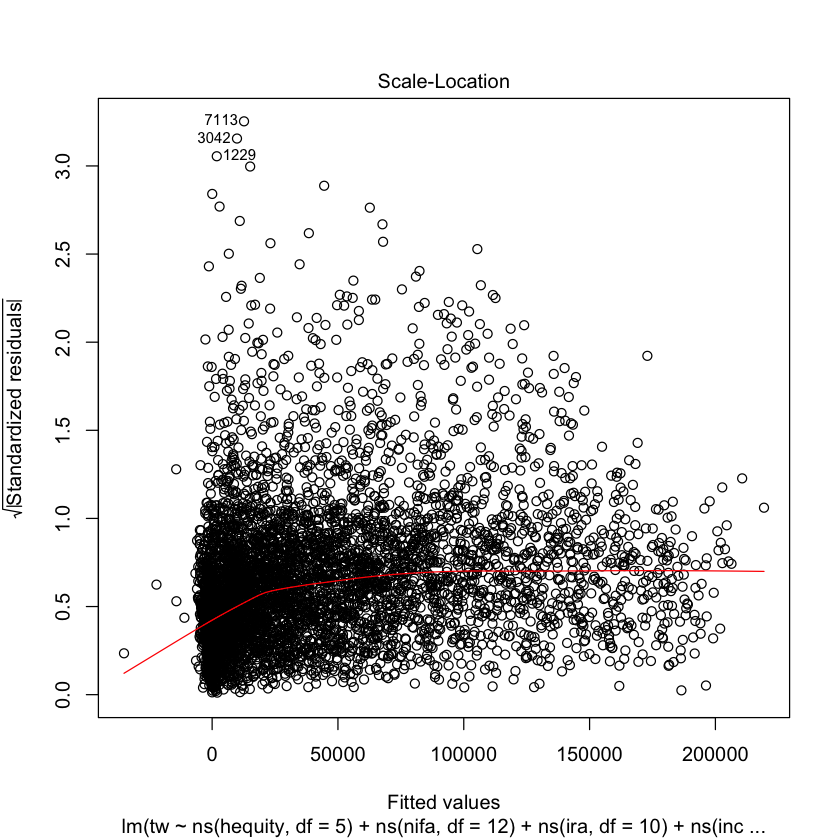

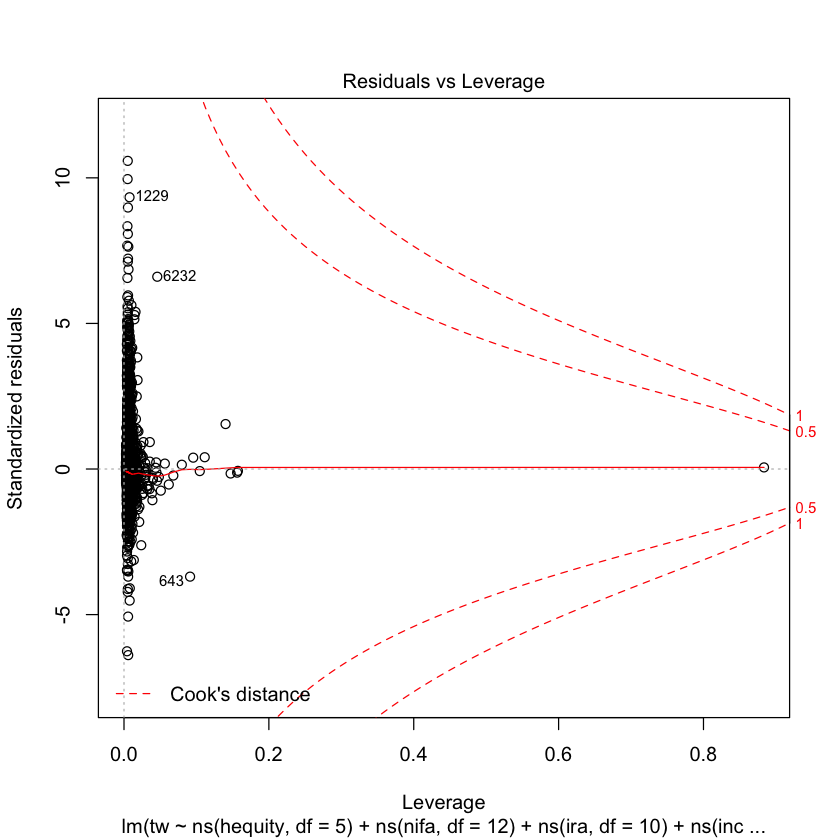

In [24]:
###Natural spline model with binary indicators
library(splines)

n <- length(y)
k <- 5
ii <- sample(rep(1:k, length= n))
pr.spline <- rep(NA, length(y))

for (j in 1:k){
  
  hold <- (ii == j)
  train <- (ii != j)
  # Spline
  spline.ns <- lm(tw ~ ns(hequity, df=5)+ ns(nifa, df=12) + ns(ira, df=10) + ns(inc, df=7) + ns(age, df=7) +
                    e401 + fsize + twoearn + nohs + male, data=data_tr[train,])
  pr.spline[hold] <- predict(spline.ns, newdata=data_tr[hold,])
}
mspe_spline <- mean((pr.spline-y)^2)
print(mspe_spline)
AIC(spline.ns)
plot(spline.ns)

In [25]:
#mspe for the natural spline returned at 312949985 and AIC of 130796

In [26]:
###Stepwise, Lasso, and ridge, with Spline basis representation
library(splines)
library(glmnet)
library(MASS)
n <- length(y)
k <- 5
ii <- sample(rep(1:k, length= n))
pr.stepwise_backward <- pr.stepwise_forward <- pr.lasso <- pr.ridge <- rep(NA, length(y))
# New dataframe of covariates for lasso and ridge
X1 <- ns(data_tr$hequity, df =5) 
X2 <- ns(data_tr$nifa, df=12)
X3 <- ns(data_tr$ira, df=10)
X4 <- ns(data_tr$inc, df=7)
X5 <- ns(data_tr$age, df=7)
X6 <- data_tr$e401
X7 <- data_tr$fsize
X8 <- data_tr$twoearn
X9 <- data_tr$nohs
X10 <- data_tr$male
data_poly <- data.frame(data_tr$tw,X1, X2, X3, X4, X5, X6, X7, X8, X9, X10)

for (j in 1:k){
  
  hold <- (ii == j)
  train <- (ii != j)
  # Spline basis representation of stepwise with polynomial variables and binary indicators
  full <- lm(tw ~ ns(hequity, df=5)+ ns(nifa, df=12) + ns(ira, df=10) + ns(inc, df=7) + ns(age, df=7) +
               e401 + fsize + twoearn + nohs + male, data=data_tr[train,])
  null <- lm(tw ~ 1, data=data_tr[train,])
  a <- stepAIC(null, scope=list(lower=null, upper=full), trace = FALSE, direction='forward')
  # backward stepwise with polynomial variables and binary indicators
  b <- stepAIC(full, scope=list(lower=null, upper=full), trace = FALSE, direction='backward')
  pr.stepwise_backward[hold] <- predict(b, newdata=data_tr[hold,])
  pr.stepwise_forward[hold] <- predict(a, newdata=data_tr[hold,])
  
  # Lasso and ridge with polynomial variables and binary indicators
  xx.tr <- data_poly[train,-1]
  y.tr <-  y[train]
  xx.te <- data_poly[hold,-1]
  ridge.cv <- cv.glmnet(x=as.matrix(xx.tr), y=y.tr, nfolds=k, alpha=0)
  lasso.cv <- cv.glmnet(x=as.matrix(xx.tr), y=y.tr, nfolds=k, alpha=1)
  pr.lasso[hold] <- predict(lasso.cv, newx=as.matrix(xx.te))
  pr.ridge[hold] <- predict(ridge.cv, newx=as.matrix(xx.te))
}

mspe_step_backward <- mean((pr.stepwise_backward-y)^2)
mspe_step_forward <- mean((pr.stepwise_forward-y)^2)
mspe.Lasso <- mean((pr.lasso-y)^2)
mspe.ridge <- mean((pr.ridge-y)^2)

cbind(mspe_step_backward, mspe_step_forward, mspe.Lasso,mspe.ridge)
AIC(a)

Warning message in predict.lm(b, newdata = data_tr[hold, ]):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(a, newdata = data_tr[hold, ]):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(b, newdata = data_tr[hold, ]):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(a, newdata = data_tr[hold, ]):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(b, newdata = data_tr[hold, ]):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(a, newdata = data_tr[hold, ]):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(b, newdata = data_tr[hold, ]):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(a, newdata = data_tr[hold, ]):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(b, newdata = data_tr[hold, ]):
“pr

mspe_step_backward,mspe_step_forward,mspe.Lasso,mspe.ridge
314001528,314001528,329095726,337791624


[1] 130676.9

In [27]:
#stepwise mspe is 312971919 adn AIC of 130785, Lasso is 331729434, and ridge is 344151062

The spline model had improvements in terms of residuals vs leverage and also the scale. The mean squared error was further reduced to 312761762, which was the lowest of all the models so far. I then ran a cross validation with stepwise, ridge, and lasso models using spline basis representation, but it did not further alter the MSPE or the AIC.
Because the stepwise, ridge, and lasso models using spline basis representation did not decrease my mean squared prediction error, I thought that another way to improve my model would be to add new transformations to the data set. I ended up squaring the age variable, to capture the effect of age to a greater extent. I then combined the binary variables: “male” and “marr” (married) by multiplying them as they seem to have a similar effect on total wealth, and combining them would decrease the complexity of my model. After rerunning the previous models with my new transformations, I noticed a minimal improvement in the prediction, but a difference nonetheless.


In [28]:
###Additional data transformations
data_tr <- cbind(data_tr, data_tr$male*data_tr$marr)
names(data_tr)[names(data_tr) == "data_tr$male * data_tr$marr"] <- "male_marr"
head(data_tr)

data_tr <- cbind(data_tr, data_tr$age^2)
names(data_tr)[names(data_tr) == "data_tr$age^2"] <- "age_sqr"
head(data_tr)


,tw,ira,e401,nifa,inc,hmort,hval,hequity,educ,male,twoearn,nohs,hs,smcol,col,age,fsize,marr,male_marr
1,53550,0,0,100,28146,60150,69000,8850,12,0,0,0,1,0,0,31,5,1,0
2,124635,0,0,61010,32634,20000,78000,58000,16,0,0,0,0,0,1,52,5,0,0
3,192949,1800,0,7549,52206,15900,200000,184100,11,1,1,1,0,0,0,50,3,1,1
4,-513,0,0,2487,45252,0,0,0,15,0,1,0,0,1,0,28,4,1,0
6,24400,0,0,9000,76860,99600,120000,20400,15,0,1,0,0,1,0,49,6,1,0
7,33299,0,0,1099,57477,63000,89000,26000,17,0,1,0,0,0,1,40,4,1,0


,tw,ira,e401,nifa,inc,hmort,hval,hequity,educ,male,twoearn,nohs,hs,smcol,col,age,fsize,marr,male_marr,age_sqr
1,53550,0,0,100,28146,60150,69000,8850,12,0,0,0,1,0,0,31,5,1,0,961
2,124635,0,0,61010,32634,20000,78000,58000,16,0,0,0,0,0,1,52,5,0,0,2704
3,192949,1800,0,7549,52206,15900,200000,184100,11,1,1,1,0,0,0,50,3,1,1,2500
4,-513,0,0,2487,45252,0,0,0,15,0,1,0,0,1,0,28,4,1,0,784
6,24400,0,0,9000,76860,99600,120000,20400,15,0,1,0,0,1,0,49,6,1,0,2401
7,33299,0,0,1099,57477,63000,89000,26000,17,0,1,0,0,0,1,40,4,1,0,1600


Although the spline model helped improve my fit, I thought that I should test the generalized additive model to further smooth the prediction. The GAM model can help the interpretibility of the model, and also increase flexibility of predictive patterns without overfitting. I created the GAM model on the same basis as the previous models,
using the “bam” function specifically built for models with large data sets to be less computationally intensive, and used the smoothing method: “REML”. The GAM model ended up having the best fit so far. The MSPE was improved to 311706591.

Loading required package: nlme
This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.


[1] 312610939


[1] 130446


Family: gaussian 
Link function: identity 

Formula:
tw ~ s(hequity, k = 5) + s(nifa, k = 12) + s(ira, k = 10) + s(inc, 
    k = 7) + s(age_sqr, k = 7) + e401 + fsize + twoearn + nohs + 
    male_marr

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 38571.87     535.92  71.973  < 2e-16 ***
e401         7175.00     503.70  14.245  < 2e-16 ***
fsize          22.35     162.45   0.138    0.891    
twoearn     -2325.51     572.83  -4.060 4.98e-05 ***
nohs         -713.01     712.71  -1.000    0.317    
male_marr      44.05    1054.57   0.042    0.967    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
             edf Ref.df       F  p-value    
s(hequity) 2.858  3.355 5897.31  < 2e-16 ***
s(nifa)    8.365  9.694  366.02  < 2e-16 ***
s(ira)     2.946  3.686  299.99  < 2e-16 ***
s(inc)     4.146  4.956   13.43 6.57e-13 ***
s(age_sqr) 2.169  2.702   11.25 2.12e-06 ***
---
Signif. codes:  0

(Intercept)         e401        fsize      twoearn         nohs    male_marr 
 38571.86513   7174.99907     22.35308  -2325.51084   -713.00784     44.04814 
s(hequity).1 s(hequity).2 s(hequity).3 s(hequity).4    s(nifa).1    s(nifa).2 
  3527.42794   -829.19922    625.73352  35478.16272 -71865.98686   4867.91697 
   s(nifa).3    s(nifa).4    s(nifa).5    s(nifa).6    s(nifa).7    s(nifa).8 
  4921.03863  -1997.40434  -4516.46241   1215.20844    -98.78412   2099.66895 
   s(nifa).9   s(nifa).10   s(nifa).11     s(ira).1     s(ira).2     s(ira).3 
 -1988.77482    165.57197  27428.17340  10776.91140   -283.61914   -977.93897 
    s(ira).4     s(ira).5     s(ira).6     s(ira).7     s(ira).8     s(ira).9 
    85.51647    402.77246     37.81362   -172.47000    -10.69383   7528.00966 
    s(inc).1     s(inc).2     s(inc).3     s(inc).4     s(inc).5     s(inc).6 
 -1336.31178   1102.96022   1858.04298   -510.29155    717.83692    346.72963 
s(age_sqr).1 s(age_sqr).2 s(age_sqr).3 s(age_sqr).4 s(age_sqr).5 s(age_sqr).6 
  1188.67660   -248.28618   -136.60815     26.49737     43.09538    891.01211

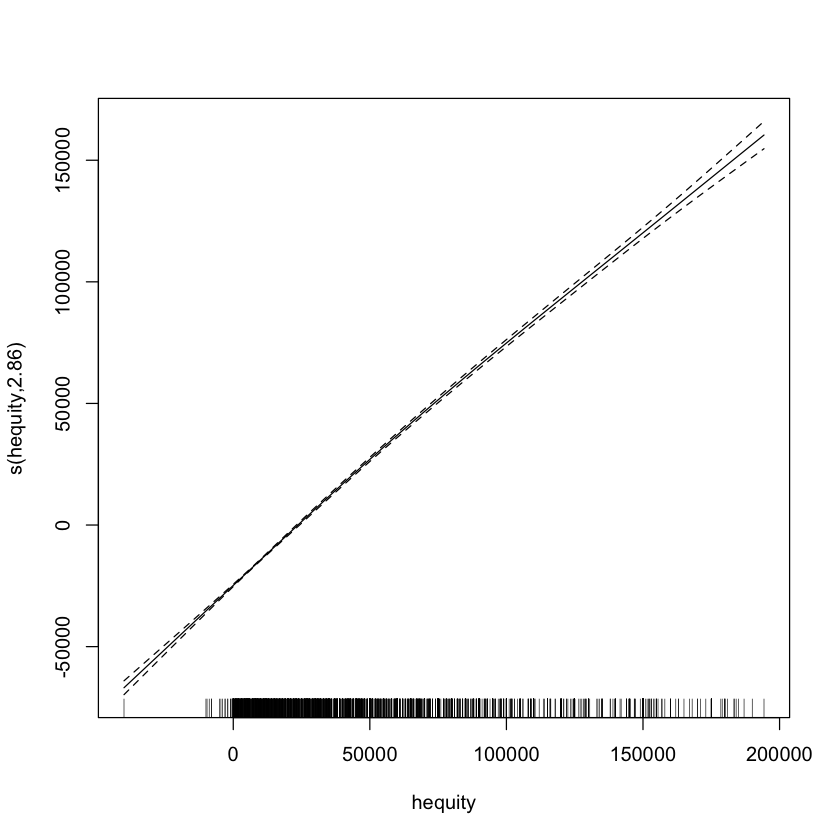

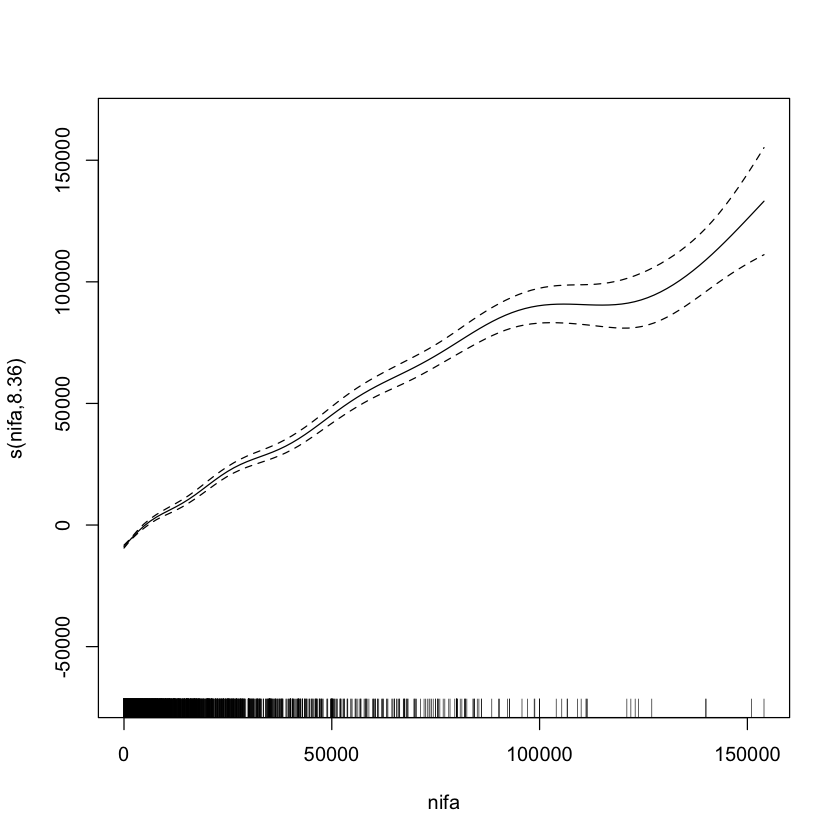

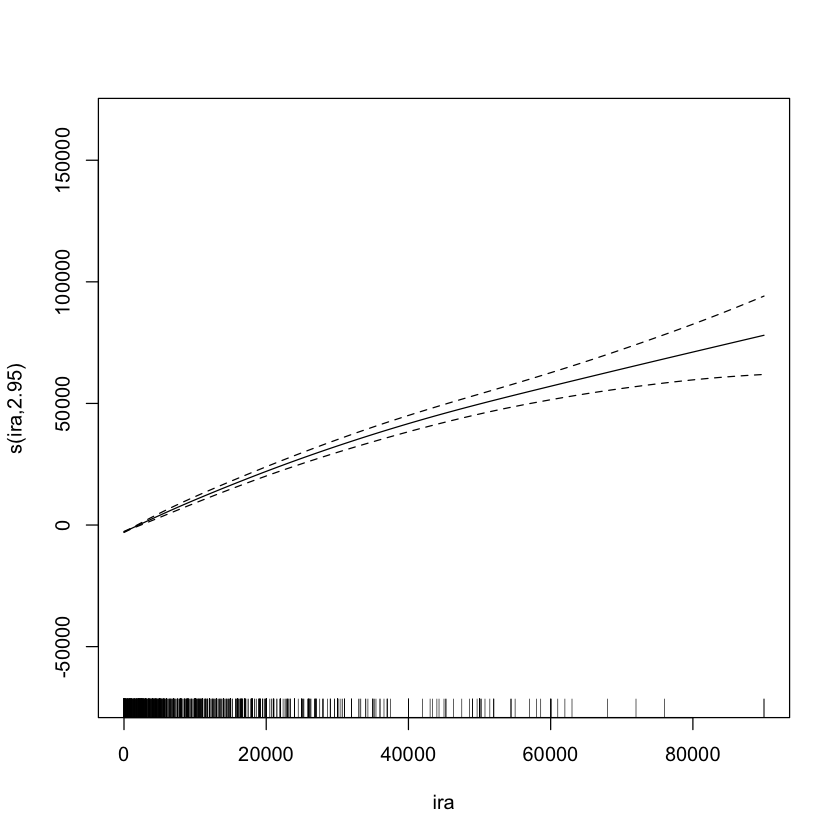

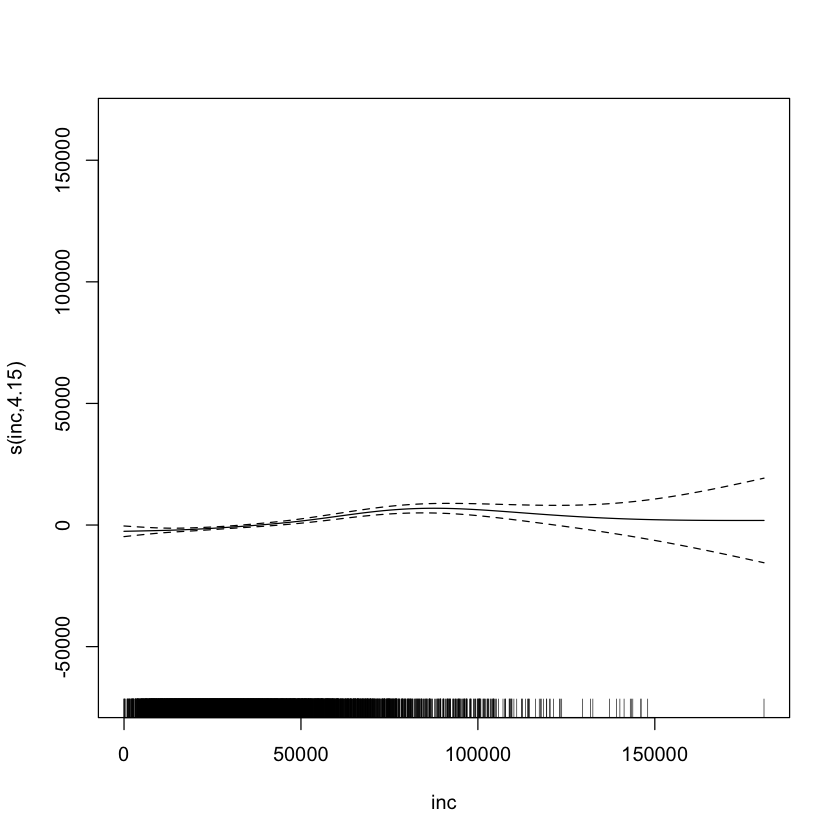

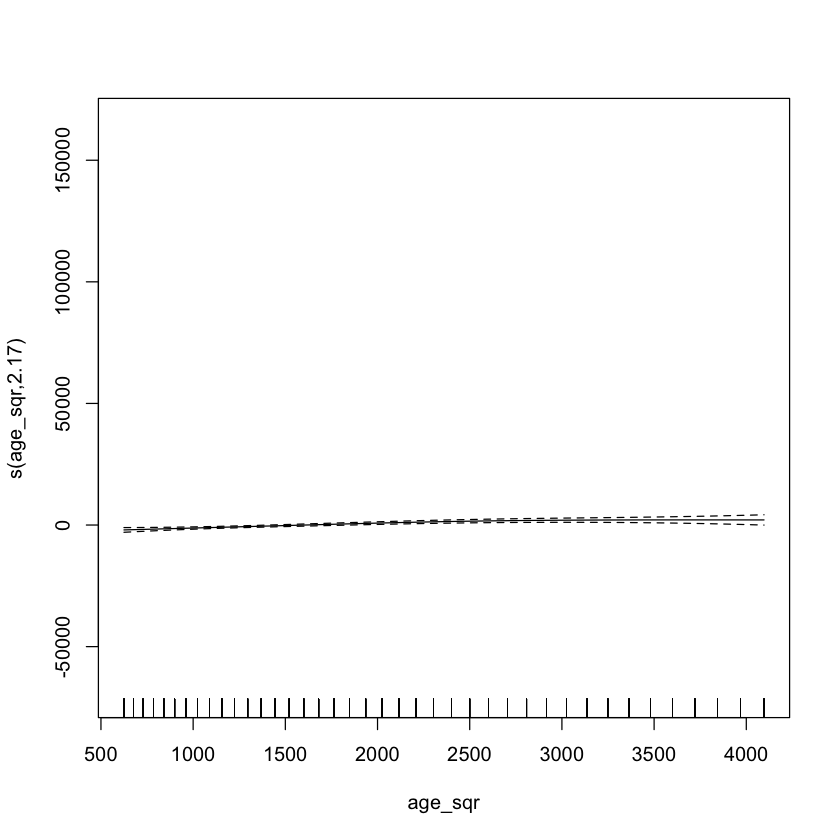


Method: REML   Optimizer: outer newton
full convergence after 6 iterations.
Gradient range [-0.01401661,0.008165901]
(score 65146.21 & scale 296629277).
Hessian positive definite, eigenvalue range [0.3538438,2912.52].
Model rank =  42 / 42 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

              k'   edf k-index p-value
s(hequity)  4.00  2.86    1.01    0.73
s(nifa)    11.00  8.36    1.01    0.66
s(ira)      9.00  2.95    1.02    0.92
s(inc)      6.00  4.15    1.01    0.59
s(age_sqr)  6.00  2.17    1.01    0.69


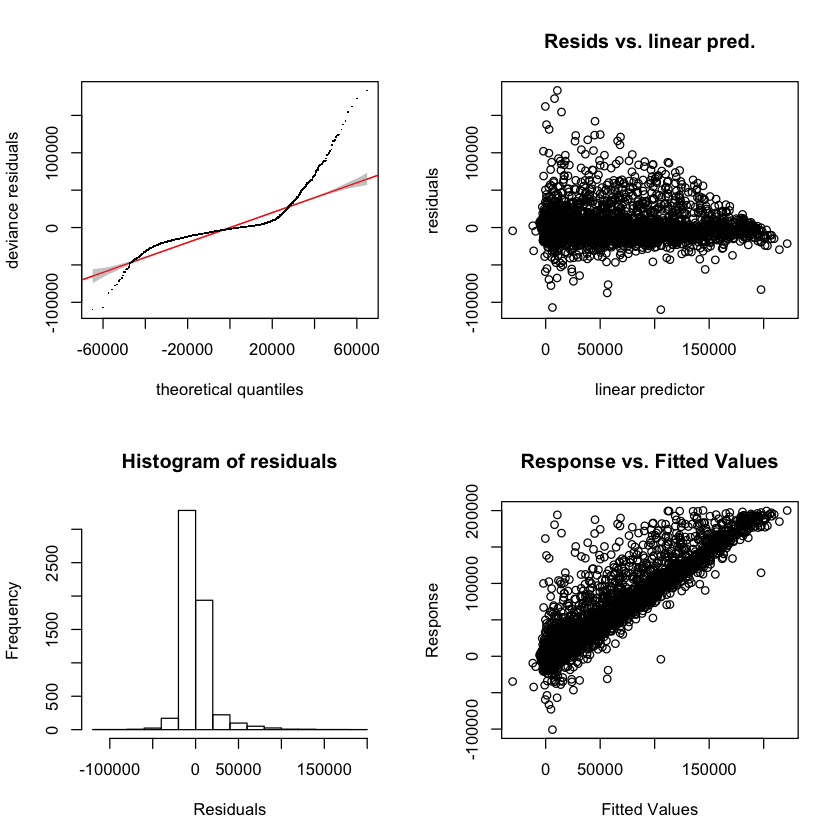

In [29]:
###Generalized additive model with binary indicators
library(mgcv)
n <- length(y)
k <- 5
ii <- sample(rep(1:k, length= n))
pr.gam2 <- rep(NA, length(y))
for (j in 1:k){
  
  hold <- (ii == j)
  train <- (ii != j)
  #gam model with transformations to variables with smoothing method "REML"
  gam2 <- bam(tw ~ s(hequity, k=5)+ s(nifa, k=12) + s(ira, k=10) + s(inc, k=7) + 
                s(age_sqr, k=7)+ e401 + fsize + twoearn + nohs + male_marr,data=data_tr[train,],method = 'REML')
  pr.gam2[hold] <- predict(gam2, newdata=data_tr[hold,])
}
mspe_gam2 <- mean((pr.gam2-y)^2)
print(mspe_gam2)
AIC(gam2)
summary(gam2)
coefficients(gam2)
plot(gam2)
gam.check(gam2, rep = 500)

In [30]:
#Lowest mspe of all models at 311706591 and lowest AIC of 130671.4

Because the model is additive, it's easier to interpret the effect of the coefficients of each variable in the model. I can see that the coefficients of “hequity” have a large and positive impact on total wealth in different ways depending on the degrees of freedom. For example, s(ira) with df=6 has a coefficient of thirty three, so the higher the ira, the higher the total wealth.

Because of the improvements I had made with the general additive model, I began using new prediction models outside of the scope of the class. I generated a random forest model using the “caret” package. The random forest model creates decision trees and averages the best tree prediction using a different subset of predictors for each tree.

In [32]:
###Randomized forest model
install.packages("caret")
library(caret)
library(randomForest)

rf1 <-train(tw~poly(hequity, 4)+ poly(nifa, 11) + poly(ira, 9) + poly(inc, 6) + poly(age, 6) +
              e401 + fsize + twoearn + nohs + male,data = data_tr, method = "rf")

#10-fold cross validation
tc <- trainControl(method = "cv", number = 10)
# Include the setup in your model
rf1_cv <- train(tw~poly(hequity, 4)+ poly(nifa, 11) + poly(ira, 9) + poly(inc, 6) + poly(age, 6) +
                  e401 + fsize + twoearn + nohs + male,data = data_tr, method = "rf",
                trControl = tc) 
rf1_cv

also installing the dependencies ‘glue’, ‘pillar’, ‘ellipsis’, ‘cli’, ‘proxy’, ‘dplyr’, ‘hardhat’, ‘ipred’, ‘lifecycle’, ‘rlang’, ‘tibble’, ‘tidyr’, ‘tidyselect’, ‘vctrs’, ‘e1071’, ‘ModelMetrics’, ‘pROC’, ‘recipes’

Warning message in install.packages("caret"):
“installation of package ‘glue’ had non-zero exit status”Warning message in install.packages("caret"):
“installation of package ‘proxy’ had non-zero exit status”Warning message in install.packages("caret"):
“installation of package ‘ipred’ had non-zero exit status”Warning message in install.packages("caret"):
“installation of package ‘rlang’ had non-zero exit status”Warning message in install.packages("caret"):
“installation of package ‘ModelMetrics’ had non-zero exit status”Warning message in install.packages("caret"):
“installation of package ‘pROC’ had non-zero exit status”Warning message in install.packages("caret"):
“installation of package ‘ellipsis’ had non-zero exit status”Warning message in install.packages("caret"):
“i

ERROR: Error in library(caret): there is no package called ‘caret’


Results from RStudio:
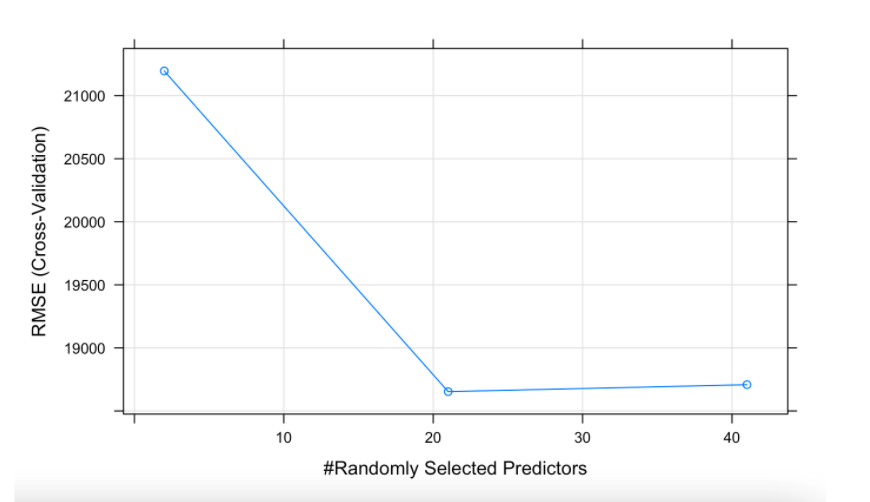


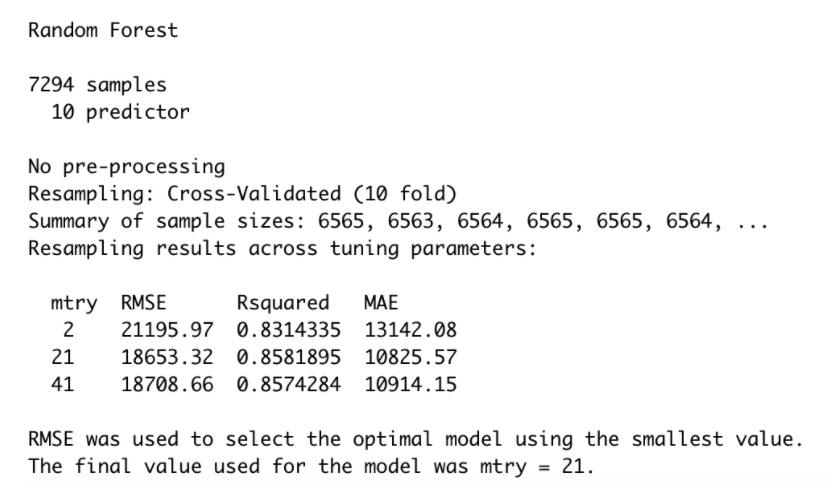

In [33]:
#Model had a mspe of 347946347

The model resulted in a mean squared prediction error of 347946347, which is substantially worse than previous models. I’m not sure why the random forest model performed poorly relative to previous models, but the number of randomly selected predictors greatly affects the predictability of the model. The computational intensiveness was inefficient as well, taking half an hour to run.

Exploring more models with the “caret” package I used a gradient boosting machine model which also uses decision trees and averages the decisions, but with each decision, the model sequentially learns based on its evaluation with the previous tree, and increases or increases the weights on the next tree based on the previous one. I ran the model on all the variables in the data set to see what it would yield. The gradient boosting model chose the number of trees that minimizes the root mean squared error, and maximizes the R squared.

In [ ]:
###Gradient boosting machine model 
tg <- expand.grid(shrinkage = seq(0.1, 1, by = 0.2), 
                  interaction.depth = c(1, 3, 7, 10),
                  n.minobsinnode = c(2, 5, 10),
                  n.trees = c(100, 300, 500, 1000))
# Verbose is a parameter sent to the underlying modeling function
library(caret)
library(gbm)
gbm_model <- train(tw ~ ., data = data_tr, 
                   method = "gbm", tuneGrid =tg, verbose = FALSE)
summary(gbm_model)
plot(gbm_model)
gbm_model
plot(gbm_model)

In [34]:
#325154467 was the MSPE

Results from RStusio:

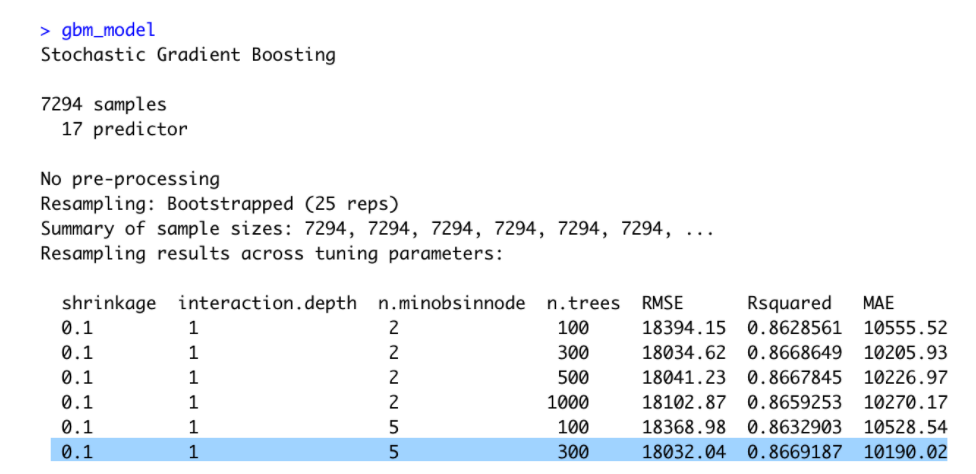

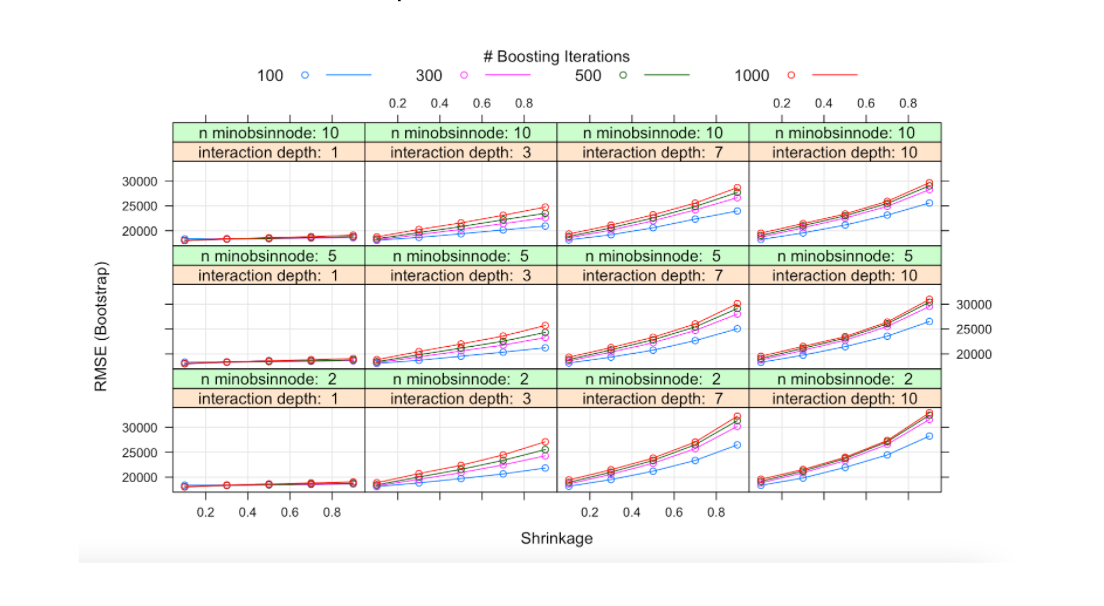

The gradient boosting machine returned a mean squared prediction error of 325154467, which is better than the randomized forest model, but still not better than the general additive model. It was also incredibly computationally intensive just as the randomized forest model, taking almost thirty minutes to run.

Lastly, I ran a support vector machine which uses a penalty parameter to increase the flexibility of the model by creating a linear model that separates the data into classes to make decisions based on smoothing the parameter and tuning the penalty based on variance. I ran the model on all available predictors.

In [35]:
###Support vector machine model
library(tidyverse)
library(caret)
# Set up Repeated k-fold Cross Validation
train_control <- trainControl(method="repeatedcv", number=10, repeats=3)
#fitting model
svm1 <- train(tw ~., data = data_tr, method = "svmLinear", trControl = train_control,  
              preProcess = c("center","scale"))
svm1

ERROR: Error: package or namespace load failed for ‘tidyverse’ in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 there is no package called ‘dplyr’


In [36]:
#MSPE was at 329608745

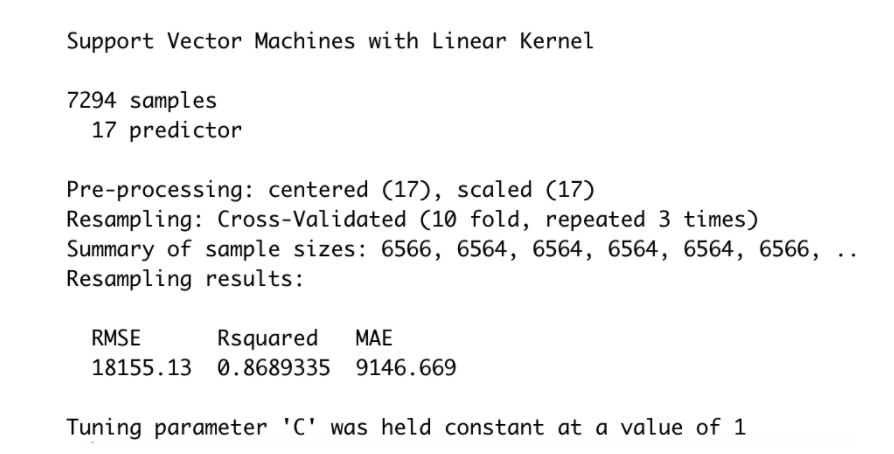

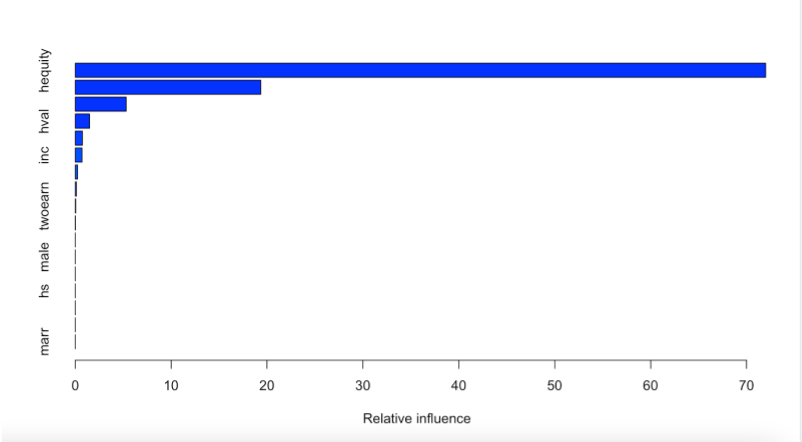

The model was again computationally intensive and resulted in a mean squared prediction error of 329608745, which still doesn’t improve on the generalized additive model.

In conclusion, my best prediction model for total wealth given the data set was the generalized additive model. Because of its unique combination of flexibility without overfitting, interpretability, and smooth capabilities, it yielded the most accurate predictions. Although the spline model also had a low mean squared prediction error, drastically improved the residuals vs leverage and also the scale, the general additive model was the best model for its combination of strengths relative to other models. The random forest model, gradient support machine, and support vector machine were incredibly inefficient in terms of time, and its results weren’t as effective as the time it took to run would have suggested, despite the gradient boost machine and vector machine models producing decent results. The data transformations had an effect, although minimal. Also, the polynomial models overfit too much but reduced the mean squared prediction error and had low interpretability due to the complexity of the formula. In all scenarios, the lasso performed better than the ridge, due to its superior tuning parameter in regards to the bias variance trade off. There are caveats however. I believe that I could have further improved my models with more data transformations. For example, instead of removing the outliers, I could have transformed total wealth as a logarithmic variable instead. I also could have further experimented in transforming the binary indicators to better deal with the threat of multicollinearity, or even try different types of spline models and different knots. But in the end, I was satisfied with the results of my general additive model.